# Object Detection Training Notebook (from scratch)
<h2>Vision & Perception Project 2021/2022</h2>
<h3>Student: Edoardo Giordani</h3>
<h3>E-mail: giordani.2020434@studenti.uniroma1.it</h3>

This notebook was used to train my from scratch implementation of a Object Detection Network. I took inspiration from the Faster RCNN architecture which turned out to be one of the most popular approach of solving the object detection problem. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/V&P/TLD

Mounted at /content/drive
/content/drive/MyDrive/V&P/TLD


### Install Dependencies & Import Libraries
As first thing, we install the dependencies and we import the libraries.

In [ ]:
# REQUIREMENTS
!pip install roboflow
!pip install albumentations==0.4.6
!pip install pytest-shutil

In [3]:
import os
import torch
import pickle
import shutil
import glob as glob
import albumentations
from roboflow import Roboflow
from albumentations.pytorch import ToTensorV2

### Cloning our own Github Repository
Here we are cloning my git repository. This will import in the environment all the funcions to train the network and process the data.

In [ ]:
!git clone https://github.com/EdoGiordani99/Traffic-Light-Detector.git

fatal: destination path 'Traffic-Light-Detector' already exists and is not an empty directory.


### Reorganizing the Folders
(just to make things more clear)

In [ ]:
# Initialiting the output directory
!mkdir outputs

# Transfering .py files to main directory
for filename in os.listdir('Traffic-Light-Detector'):
    if filename != '.git' and filename != 'README.md': 
        old = 'Traffic-Light-Detector/'+filename
        new = filename

        shutil.move(old, new)

# Remooving the github repository folder
!rm -rf Traffic-Light-Detector

mkdir: cannot create directory ‘outputs’: File exists
^C


### Download the Dataset
The dataset was manually collected by myself: I shooted some photos with an high resolution camera of traffic lights all over the city. The images were then processed with the help of the **RoboFlow** framework. This made the annotation and labeling process really easy and fast. 

Here we are simply downloading the annotated dataset from my Roboflow Account

In [ ]:
rf = Roboflow(api_key="cJ4ImlUPhvj3p4yBOaJj")
project = rf.workspace("traffic-light-detector-bnryi").project("traffic-light-detector-o3g9q")
dataset = project.version(2).download("voc")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Traffic-Light-Detector-2 in voc:: 100%|██████████| 413/413 [00:12<00:00, 33.65it/s]


In [ ]:
os.rename('Traffic-Light-Detector-2', 'data')

### Training
Finally, we get to the training. All the hyper-parameters can be set into the *config.py* file.


Unfortunately, due to Colab limitations, I didn't manage to carry on with very long training (over 50 epochs). Epochs could be increased by reducing image size: in this way training will be faster since we have less parameters to learn.

In [ ]:
#@title Run only if a previous training was done
!rm outputs/valid_history
!rm outputs/train_history

In [4]:
!python train.py

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Number of training samples: 143
Number of validation samples: 35

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be rem

###Save the model into the drive

In [ ]:
# Copying histories and trained models to make comparisons
!cp outputs/train_history trainings/3/
!cp outputs/valid_history trainings/3/
!cp outputs/best_model.pth trainings/3/
!cp outputs/last_model.pth trainings/3/

###Plotting the train-val loss

In [ ]:
with open('outputs/train_history', 'rb') as f:
    train_history = pickle.load(f)

with open('outputs/valid_history', 'rb') as f:
    valid_history = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

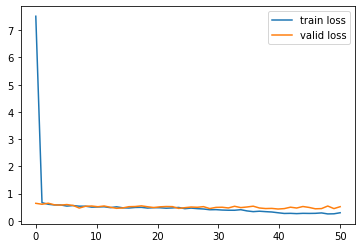

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(train_history), len(train_history))
train_line = ax.plot(x, train_history);
valid_line = ax.plot(x, valid_history);
ax.legend(['train loss', 'valid loss'])